# Quantum Mechanics Tools
## Section 3: Intramolecular Potential Energy Surfaces part 1
__Questions__

How do I calculate a potential energy surface for the interaction between two molecules?

__Objectives__

Use a z-matrix representation to specify the geometry of a molecule or complex.

Use a nested for loop to vary two molecular parameters in a calculation.

Use a 2D and 3D plots to visualize data.

### Overview

In this exercise we will scan the intermolecular potential energy surfaces of a pair of molecules (dimer): the water dimer.

### Specifying water dimer geometry

Here you will setup your the potential energy surface scans. The first step is to create your molecule using what is called a __z-matrix specification. In this type of geometry specification, you specify the geometry of a molecule through connectivity, that is, by listing each atom and defining its connectivity to other atoms.__

In [1]:
import psi4
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# set the amount of memory that you will need
psi4.set_memory('500 MB')

# set the molecule name for your files and plots
molecule_name = "h2o-dimer"

# Define water dimer
water_dimer = """
O1
H2 1 1.0
H3 1 1.0 2 104.52
x4 2 1.0 1 90.0 3 180.0
--
O5 2 **R** 4 90.0 1 180.0
H6 5 1.0 2 120.0 4 90.0
H7 5 1.0 2 120.0 4 -90.0
"""

### Scan 1D PES

Now we will perform a one-dimensional (1D) scan of the water dimer as the intermolecular distance between the two molecules is increased. The scan will be performed along the vector connecting the two oxygen atoms of the molecule.

Since the monomer geometries are not changing and since we don’t care about the absolute energy, we will be computing the interaction energy. For a dimer the interaction energy is calculated by subtracting the energy of the monomers from the energy of the dimer. This is done automatically by using the command bsse_type='cp'.

In [5]:
rvals = [1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 3.0, 3.5] 
energies = []
for r in rvals:
    # Build a new molecule at each separation
    mol = psi4.geometry(water_dimer.replace('**R**', str(r)))

    # Compute the interaction energy
    E = psi4.energy('scf/aug-cc-pVDZ', molecule=mol, bsse_type='cp')

    # Place in a reasonable unit, kcal/mole in this case
    E = E*627.509

    # Append the value to our list
    energies.append(E)

print("Finished computing the potential energy surface!")

Finished computing the potential energy surface!


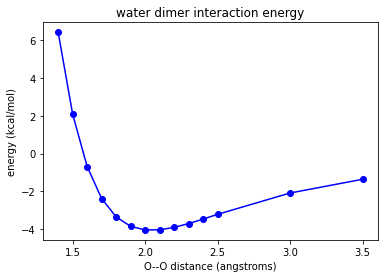

In [41]:
#Plot the energies vs. separation of the two oxygen atoms (R).

plt.figure()
plt.plot(rvals, energies,'bo-')
plt.xlabel('O--O distance (angstroms)')
plt.ylabel('energy (kcal/mol)')
plt.title('water dimer interaction energy')
plt.savefig('water_dimer_1D.png',dpi=300)
plt.show()

### Scan 2D PES

Now let’s get even more detailed! Instead of simply scanning the PES along a single coordinate, let’s consider two coordinates at the same time. For this, we will choose to look at (1) the distance between the two molecules, and (2) a rotation of one of the molecules about the distance vector.

To do this, the first thing we need to do is redefine our z-matrix to define the angle we want to change. To maintain the water molecule as planar, we need to adjust two dihedral angles, such that one angle is always 180 from the other. We will define one of these dihedral angles as A and the other as B.

In [15]:
# Define water dimer
water_dimer2 = """
O1
H2 1 1.0
H3 1 1.0 2 104.52
x4 2 1.0 1 90.0 3 180.0
--
O5 2 **R** 4 90.0 1 180.0
H6 5 1.0 2 120.0 4 **A**
H7 5 1.0 2 120.0 4 **B**
"""

First, let’s choose one value of R and rotate through many dihedral angles. Since we want our water to remain planar, the two dihedral angles aren’t actually independent; they must always be 180 degrees apart. Therefore, we will choose a range of values for A, and then calculate B based on the value of A. We will create a list called energies_R to store our energy values for this particular value of R.

In [16]:
R = 1.8
Avals = np.linspace(start=-180,stop=180, num=25)

energies_R = []

for A in Avals:

    print(F'Computing dimer at {R:.1f} angstroms and {A:.2f} degrees')

    # Build a new molecule at each separation
    B = A-180
    molR = water_dimer2.replace('**R**', str(R))
    molA = molR.replace('**A**', str(A))
    molB = molA.replace('**B**', str(B))
    mol = psi4.geometry(molB)

    # calculate energy
    psi4.set_output_file(F'{molecule_name}_{R:.1f}_{A:.2f}_energy.dat', False)
    E = psi4.energy('scf/aug-cc-pVDZ', molecule=mol, bsse_type='cp')       
    E = E*627.509
    energies_R.append(E)

Computing dimer at 1.8 angstroms and -180.00 degrees
Computing dimer at 1.8 angstroms and -165.00 degrees
Computing dimer at 1.8 angstroms and -150.00 degrees
Computing dimer at 1.8 angstroms and -135.00 degrees
Computing dimer at 1.8 angstroms and -120.00 degrees
Computing dimer at 1.8 angstroms and -105.00 degrees
Computing dimer at 1.8 angstroms and -90.00 degrees
Computing dimer at 1.8 angstroms and -75.00 degrees
Computing dimer at 1.8 angstroms and -60.00 degrees
Computing dimer at 1.8 angstroms and -45.00 degrees
Computing dimer at 1.8 angstroms and -30.00 degrees
Computing dimer at 1.8 angstroms and -15.00 degrees
Computing dimer at 1.8 angstroms and 0.00 degrees
Computing dimer at 1.8 angstroms and 15.00 degrees
Computing dimer at 1.8 angstroms and 30.00 degrees
Computing dimer at 1.8 angstroms and 45.00 degrees
Computing dimer at 1.8 angstroms and 60.00 degrees
Computing dimer at 1.8 angstroms and 75.00 degrees
Computing dimer at 1.8 angstroms and 90.00 degrees
Computing dime

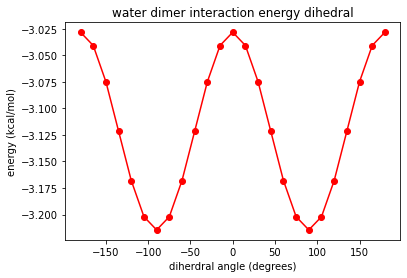

In [42]:
# Plot the energy as a function of the dihedral angle A.

plt.figure()
plt.plot(Avals, energies_R, 'ro-')
plt.xlabel('diherdral angle (degrees)')
plt.ylabel('energy (kcal/mol)')
plt.title('water dimer interaction energy dihedral')
plt.savefig('water_dimer_2D.png',dpi=300)
plt.show()

Now let’s expand to two degrees of freedom. We will use the same angles as before, but now instead of just doing all the calculations at a single value of R, we will do the calculation at multiple values of R. To do this, we will use a nested for loop. This means we will have an outer for loop that counts over the different values of R and then an inner for loop that counts over the different values of A for a particular value of R. As we calculate the energies at each angle for a particular value of R, we will save the values in a list called energies_R as we did before. Once we have finished all the angles for a particular R, we will append the list energies_R to a list called energy_2D. This means energy_2D will be a list of lists. We will need to create energy_2D as an empty list outside of our for loop.

In [23]:
Rvals = np.linspace(start=1.8,stop=2.5,num=8)
Avals = np.linspace(start=-180,stop=180, num=25)

energy_2D = []

for R in Rvals:
    energies_R = []

    for A in Avals:

        print(F'Computing dimer at {R:.1f} angstroms and {A:.2f} degrees')

        # Build a new molecule at each separation
        B = A-180
        molR = water_dimer2.replace('**R**', str(R))
        molA = molR.replace('**A**', str(A))
        molB = molA.replace('**B**', str(B))
        mol = psi4.geometry(molB)

        # calculate energy
        psi4.set_output_file(F'{molecule_name}_{R:.1f}_{A:.2f}_energy.dat', False)
        E = psi4.energy('scf/aug-cc-pVDZ', molecule=mol, bsse_type='cp')       
        E = E*627.509
        energies_R.append(E)

    energy_2D.append(energies_R)

print(F'All calculations are complete!')

Computing dimer at 1.8 angstroms and -180.00 degrees
Computing dimer at 1.8 angstroms and -165.00 degrees
Computing dimer at 1.8 angstroms and -150.00 degrees
Computing dimer at 1.8 angstroms and -135.00 degrees
Computing dimer at 1.8 angstroms and -120.00 degrees
Computing dimer at 1.8 angstroms and -105.00 degrees
Computing dimer at 1.8 angstroms and -90.00 degrees
Computing dimer at 1.8 angstroms and -75.00 degrees
Computing dimer at 1.8 angstroms and -60.00 degrees
Computing dimer at 1.8 angstroms and -45.00 degrees
Computing dimer at 1.8 angstroms and -30.00 degrees
Computing dimer at 1.8 angstroms and -15.00 degrees
Computing dimer at 1.8 angstroms and 0.00 degrees
Computing dimer at 1.8 angstroms and 15.00 degrees
Computing dimer at 1.8 angstroms and 30.00 degrees
Computing dimer at 1.8 angstroms and 45.00 degrees
Computing dimer at 1.8 angstroms and 60.00 degrees
Computing dimer at 1.8 angstroms and 75.00 degrees
Computing dimer at 1.8 angstroms and 90.00 degrees
Computing dime

Computing dimer at 2.4 angstroms and -60.00 degrees
Computing dimer at 2.4 angstroms and -45.00 degrees
Computing dimer at 2.4 angstroms and -30.00 degrees
Computing dimer at 2.4 angstroms and -15.00 degrees
Computing dimer at 2.4 angstroms and 0.00 degrees
Computing dimer at 2.4 angstroms and 15.00 degrees
Computing dimer at 2.4 angstroms and 30.00 degrees
Computing dimer at 2.4 angstroms and 45.00 degrees
Computing dimer at 2.4 angstroms and 60.00 degrees
Computing dimer at 2.4 angstroms and 75.00 degrees
Computing dimer at 2.4 angstroms and 90.00 degrees
Computing dimer at 2.4 angstroms and 105.00 degrees
Computing dimer at 2.4 angstroms and 120.00 degrees
Computing dimer at 2.4 angstroms and 135.00 degrees
Computing dimer at 2.4 angstroms and 150.00 degrees
Computing dimer at 2.4 angstroms and 165.00 degrees
Computing dimer at 2.4 angstroms and 180.00 degrees
Computing dimer at 2.5 angstroms and -180.00 degrees
Computing dimer at 2.5 angstroms and -165.00 degrees
Computing dimer at

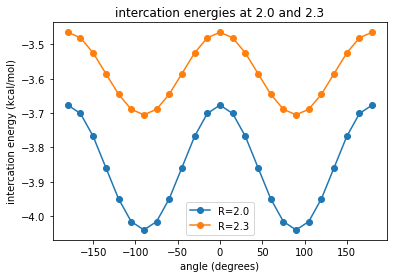

In [43]:
#Plot the interaction energies as a function of angle for 
#two different values of R, 2.0 and 2.3, on the same graph.

plt.figure()
plt.plot(Avals, energy_2D[2], 'o-',label='R=2.0',)
plt.plot(Avals, energy_2D[5], 'o-',label='R=2.3')
plt.xlabel('angle (degrees)')
plt.ylabel('intercation energy (kcal/mol)')
plt.title('intercation energies at 2.0 and 2.3')
plt.legend()
plt.savefig('intercation_energy_at2R_2D.png', dpi=300)
plt.show()


### Making 3D plots

Comparing the two graphs you just made, it is clear that the interaction energy is a function of both the seperation between the molecules and the rotation angle. We can capture this in a 3D plot using some of matplotlib’s advanced features.

In [40]:
# it doesn't work
from mpl_toolkits import mplot3d
%matplotlib inline

X, Y = np.meshgrid(Avals, Rvals)

mycmap1 = plt.get_cmap('gist_earth')

fig, (ax,ax2) = plt.subplots(1,2,figsize=(12,6))

ax = plt.axes(projection='3d')
cf = ax.contour3D(X, Y, np.array(nrg_2D), 300, cmap=mycmap1)
ax.plot_surface(X, Y, np.array(nrg_2D), rstride=1, cstride=1, cmap='viridis', edgecolor='none')

ax.set_xlabel('angle (degrees)')
ax.set_ylabel('R (Bohr)')
ax.set_zlabel('energy (kcal/mol)')
#ax.set_zlim3d(-4,-2)
ax.view_init(45, 35)

### Key Points

The z-matrix is a way to specify the geometry of a molecule based on connectivity.